# Assignment 8
### Ray Chandonnet
### 12/15/2022

### The libraries you will use are already loaded for you below

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [8]:
path = "/users/raychandonnet/Dropbox (Personal)/Merrimack College - MS in Data Science/DSE5002/Week_8/Data/Netflix/"
credits=pd.read_csv(path + "credits.csv") # Read in credits file
titles=pd.read_csv(path + "titles.csv") # Read in titles file
genres=titles['genres'].tolist() # Turn genres column into a list
# now iterate through the list, eliminating brackets, apostrophes and spaces in each text string so you are left with 
# a string with each genre separated by commas.  Then split that string into a list using comma as the separator
# When done, you have a list of lists of genres, parsed properly without the special characters 
for i in range(0,len(genres)):
    genres[i]=genres[i].replace("[","")
    genres[i]=genres[i].replace("]","")
    genres[i]=genres[i].replace("'","")
    genres[i]=genres[i].replace(" ","")
    genres[i]=genres[i].split(",")
genres=list(chain(*genres))  # now flatten the list
genres=pd.DataFrame(genres,columns=['Genre']) # change to a dataframe so can use the unique method
unique_genres=pd.DataFrame(genres['Genre'].unique(),columns=['Genre'])  # Return a dataframe of unique Genre values
unique_genres=unique_genres[unique_genres['Genre']!=''] # eliminate blank genres
print("There are ",len(unique_genres),"unique non-blank genres found in the title table:")
print(unique_genres)

There are  19 unique non-blank genres found in the title table:
            Genre
0   documentation
1           crime
2           drama
3          comedy
4         fantasy
5          horror
6        european
7        thriller
8          action
9           music
10        romance
11         family
12        western
13            war
14      animation
15        history
16          scifi
17        reality
18          sport


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [9]:
# First calculate the mean score by year - note that using "as_index=False" returns a dataframe with normal 0:N index
# rather than a series so no need to convert to a dataframe
avg_by_year=titles.groupby('release_year',as_index=False)['imdb_score'].mean()
avg_by_year=avg_by_year.set_index('release_year') # change the index to the release year
# Now I use the idxmax method to identify the index with the highest imdb_score;  Since the output comes as a series,
# I assume the first value [0] to a high score year variable as an integer
highest_score_year = avg_by_year.idxmax(axis=0)[0]
# Now I can directly access the score for that year using the year as my index
highest_score=avg_by_year['imdb_score'][highest_score_year]
print("The year with the highest average IMDB score was",highest_score_year)
print("The average IMDB score that year was",highest_score)

The year with the highest average IMDB score was 1985
The average IMDB score that year was 8.0


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [14]:
# First Create a new table that joins the movie titles with the people credited, by movie id
titles_and_people=pd.merge(left=titles,right=credits,how='left',on='id')
# Now slice that table so it is only is only showing type=MOVIE and role = ACTOR
movies_and_actors = titles_and_people[(titles_and_people["type"] =='MOVIE') & (titles_and_people["role"] == "ACTOR")]
movies_and_actors.shape


actors_per_movie=actors_per_movie.set_index('id') # change the index to the id
actors_per_movie=actors_per_movie.rename({'name':'actors'}, axis=1)  # change column name 
# Now I use the idxmax method to identify the movie with the most actors;  Since the output comes as a series,
# I assign the first value [0] to a movie_id variable 
movie_id = actors_per_movie.idxmax(axis=0)[0]
actors=actors_per_movie['actors'][movie_id] # get the number of actors for that movie
movie_match=titles[titles['id']==movie_id] # Find the movie in the titles table by ID
movie_name=movie_match.iloc[0]['title'] # pull the movie title from the movie data
print("The movie with the most actors in it was", movie_name)
print("That movie had",actors,"actors in it")
print("I disagree with the statement that the movie has 208 actors credited;")
print("It has 208 people credited, but one of them is a DIRECTOR and not an ACTOR")
nonactors = titles_and_people[(titles_and_people["id"] ==movie_id) & (titles_and_people["role"] != "ACTOR")]
nonactors=nonactors[['id','title','name','role']]
print("The non-actors are:")
print(nonactors)

The movie with the most actors in it was Les Misérables
That movie had 207 actors in it
I disagree with the statement that the movie has 208 actors credited;
It has 208 people credited, but one of them is a DIRECTOR and not an ACTOR
The non-actors are:
            id           title        name      role
14322  tm32982  Les Misérables  Tom Hooper  DIRECTOR


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

The highest imdb score found for movies featuring Robert De Niro is 8.3
Number of his movies with that score:  2
Movie names and release dates are:
                           title  release_year
1                    Taxi Driver          1976
799  Once Upon a Time in America          1984


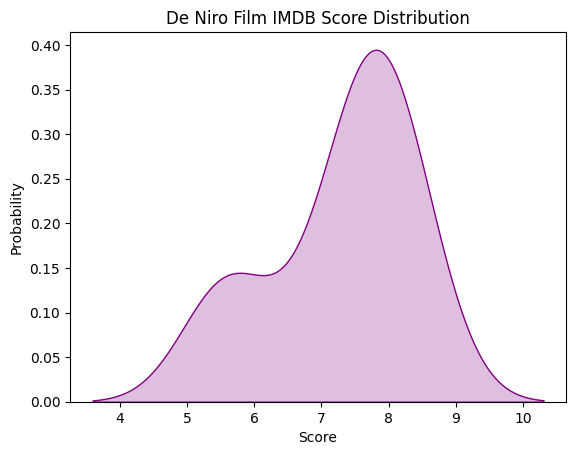

In [17]:
# Further slice the titles and people table for only De Niro flicks
deniro_films = titles_and_people[(titles_and_people["type"] =='MOVIE') & (titles_and_people["name"] == "Robert De Niro")]
deniro_films.shape
max_imdb=deniro_films.max(numeric_only=True)['imdb_score'] # identify the max score
max_match=deniro_films[(deniro_films['imdb_score']==max_imdb)] #slice the data frame for only films with that max score
max_match=max_match[["title","type","release_year","imdb_score","name","role"]] # reduce columns to only relevant ones
print("The highest imdb score found for movies featuring Robert De Niro is",max_imdb)
print("Number of his movies with that score: ",len(max_match))
print("Movie names and release dates are:")
print(max_match[["title","release_year"]])

# Now build and display simple kdeplot 
data_to_plot = deniro_films['imdb_score']
res = sns.kdeplot(data_to_plot,
                  color='purple',
                  fill=True)
plt.title('De Niro Film IMDB Score Distribution')
plt.ylabel('Density')
plt.xlabel('IMDB Score')
plt.show()

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


The first way found 437 war movie(s) and 35 gangster movies
The second way found 155 war movie(s) and 27 gangster movies
Average IMDB rating for war movies (using the whole-word search) is 6.9315068493150696
Average IMDB rating for gangster movies (using the whole-word search) is 6.344444444444444
Therefore, average rating for war movies is greater


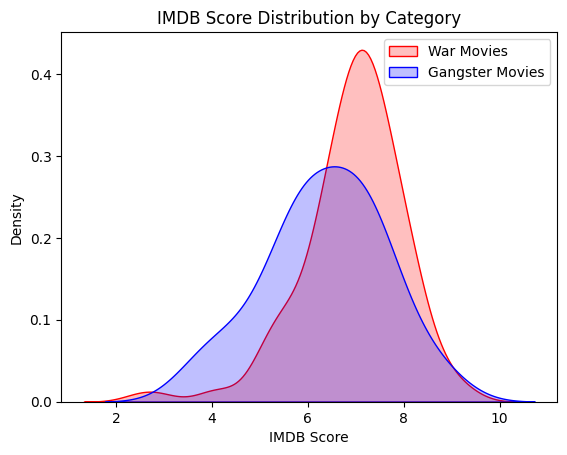

In [18]:
# So we can do this a few ways as far as finding those strings 'war' and 'gangster', with slightly different results
# The first way is to just search for that string.  It works, but will find cases where 'war'  is embedded in a bigger word
# like 'ward', 'warden', 'award' etc.  (I ignore case sensitivity here because a lot of the war movies are things like
# World War II which are clearly intended to be included)
titles['war_movies'] = titles['description'].str.contains(pat='war',case=False)
titles['gangster_movies'] = titles['description'].str.contains(pat='gangster',case=False)
# Now use the shape function to count the cases where they are both true
first_way_count1 = titles[titles.war_movies == True].shape[0]
first_way_count2 = titles[titles.gangster_movies == True].shape[0]
print("The first way found",first_way_count1,"war movie(s) and",first_way_count2,"gangster movies")
# However, when examining the results, 2 of those three matches include the string 'war' in a bigger word (specifically
# 'ward' and 'warden'.)  Not really the intent.  SO I can also do it using a regex that only searches for the whole word
# 'war', with different results
titles['war_movies'] = titles['description'].str.contains(pat=r'\bwar\b',case=False)
titles['gangster_movies'] = titles['description'].str.contains(pat=r'\bgangster\b',case=False)
second_way_count1 = titles[titles.war_movies == True].shape[0]
second_way_count2 = titles[titles.gangster_movies == True].shape[0]
print("The second way found",second_way_count1,"war movie(s) and",second_way_count2,"gangster movies")
# Now we calculate the mean for the slices of the table that identifies war movies and gangster movies
war_IMDB=titles.loc[titles['war_movies']==True,'imdb_score'].mean()
gangster_IMDB=titles.loc[titles['gangster_movies']==True,'imdb_score'].mean()
print("Average IMDB rating for war movies (using the whole-word search) is",war_IMDB)
print("Average IMDB rating for gangster movies (using the whole-word search) is",gangster_IMDB)
if war_IMDB > gangster_IMDB:
    print("Therefore, average rating for war movies is greater")
elif gangster_IMDB > war_IMDB:
    print("Therefore, average rating for gangster movies is greater")
else:
    print("Therefore, their average ratings are the same")
# Finally the graph.  I'm probably too much of a perfectionist but I really wanted the two plots on the same graph!
# I discovered after a ton of digging that in order to do that, your two series have to have different names!
# So what I'm doing here is creating two series that slice the IMDB scores for war movies and gangster movies,
# delete any NaN values (since some don't have an IMDB score), and the rename the series.  That lets me then plot
# the kernel densitiy on the same graph
war_ratings=titles[titles.war_movies == True]['imdb_score'].dropna() # slice war movie IMDB scores
war_ratings=war_ratings.rename("War Movies") # rename
gangster_ratings=titles[titles.gangster_movies == True]['imdb_score'].dropna() # slice gangster movie IMDB scores
gangster_ratings=gangster_ratings.rename("Gangster Movies") # rename
fig = sns.kdeplot(war_ratings, fill=True, color="r") # plot war movie scores
fig = sns.kdeplot(gangster_ratings, fill=True, color="b") # plot gangster movie scores
plt.title('IMDB Score Distribution by Category') # make it pretty
plt.ylabel('Density')
plt.xlabel('IMDB Score')
plt.legend(labels=["War Movies","Gangster Movies"],loc='upper right')
plt.show()